In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, recall_score, precision_score
import os, sys
import random as rd

from sklearn.model_selection import learning_curve

sys.dont_write_bytecode = True
os.chdir("..")

from utils import mnist_reader


In [3]:
seed = 1234
np.random.seed(seed)  
import matplotlib.ticker

In [4]:
def scale_data(X_tr: np.array, X_te: np.array) -> tuple[np.array, np.array]:
    scaler_tr = StandardScaler()
    
    scaler_tr.fit(X_tr)

    X_tr_scaled = scaler_tr.transform(X_tr)
    X_te_scaled= scaler_tr.transform(X_te)
    return X_tr_scaled, X_te_scaled

In [5]:
"""Load and Scale the Data"""
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_tr_scaled, X_te_scaled = scale_data(X_train, X_test)

In [5]:
#function to train the classifier based on number of data
def training_set_size(X_tr, y_tr, X_te, y_te, n_data):
    tr_accuracies = []
    te_accuracies = []
    best_number = None
    best_accuracy = -np.inf
    for n in n_data:
        clf = LogisticRegression(max_iter=1500, C=1.5, random_state=seed)
        clf.fit(X_tr[:n], y_tr[:n])
        tr_ac = clf.score(X_tr[:n], y_tr[:n])
        te_ac = clf.score(X_te, y_te)
        tr_accuracies.append(tr_ac)
        te_accuracies.append(te_ac)
        if(te_ac > best_accuracy):
            best_number = n
            best_accuracy = te_ac
    
    """
    plot the graph
    """
    figure, axes = plt.subplots(1, figsize=(5, 4))
    axes.semilogx(n_data, tr_accuracies, color="red", label="tr_accuracy")
    axes.semilogy(n_data, te_accuracies, color="green",label="te_accuracy")
    plt.xlabel('Num. Training Data Points')
    plt.ylabel('accuracy')
    plt.title("Relation between prediction accuracy and number of training data")
    plt.legend()
    plt.show()
    return best_number, best_accuracy

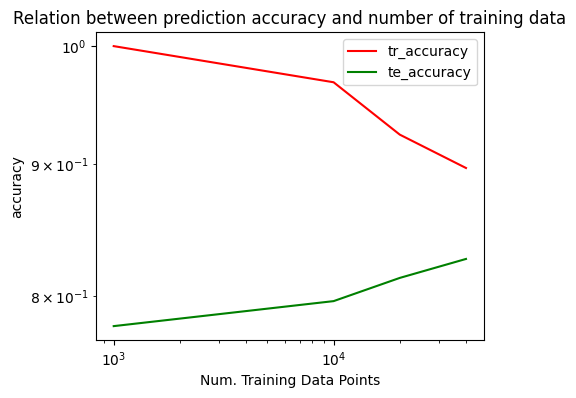

In [6]:
"""pass in different number of tranining size and test out the relation between accuracy and training size"""
best_number, best_accuracy_size = training_set_size(X_tr_scaled, y_train, X_te_scaled, y_test, np.array([1000,10000,20000,40000]))

In [58]:
#function to train the classifier based on regularzation
def train_regularization(X_tr, y_tr, X_te, y_te, c_list) -> None:
    tr_accuracies = []
    te_accuracies = []
    best_regularization = None
    best_accuracy = -np.inf
    for c in c_list:
        clf = LogisticRegression(max_iter=1000, C=c, random_state=seed)
        clf.fit(X_tr[:20000], y_tr[:20000])
        tr_ac = clf.score(X_tr[:20000], y_tr[:20000])
        te_ac = clf.score(X_te, y_te)
        tr_accuracies.append(tr_ac)
        te_accuracies.append(te_ac)
        if(te_ac > best_accuracy):
            best_regularization = c
            best_accuracy = te_ac
    """
    plot the graph
    """
    figure, axes = plt.subplots(1, figsize=(5, 4))
    axes.semilogx(c_list, tr_accuracies, color="red", label="tr_accuracy")
    axes.semilogy(c_list, te_accuracies, color="green",label="te_accuracy")
    plt.xlabel('regularization strength')
    plt.ylabel("accuracy")
    plt.legend()
    plt.title("Relation between prediction accuracy and regularizatino strength")
    plt.show()
    return best_regularization, best_accuracy

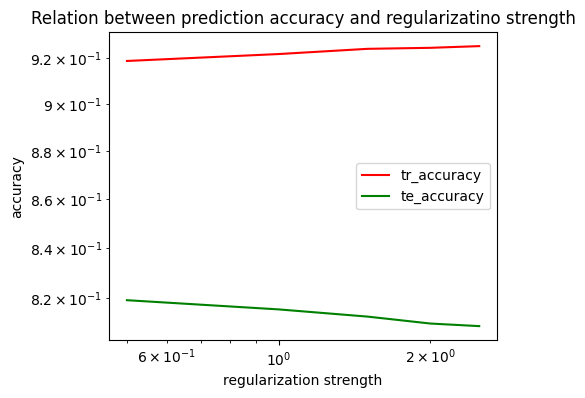

In [59]:
"""pass in different number of regularization and test out the relation between accuracy and strength of regularization"""
best_regularization, best_accuracy_regularizatoin = train_regularization(X_tr_scaled, y_train, X_te_scaled, y_test, np.array([0.5,1,1.5,2,2.5]))

In [7]:
#function to train based on solver
def train_solver(X_tr,y_tr,X_te,y_te,solver_list):
    tr_accuracies = []
    te_accuracies = []
    best_solver = None
    best_accuracy = -np.inf
    for solver in solver_list:
        clf = LogisticRegression(max_iter=500, random_state=seed, solver=solver)
        clf.fit(X_tr[:20000], y_tr[:20000])
        tr_ac = clf.score(X_tr[:20000], y_tr[:20000])
        te_ac = clf.score(X_te, y_te)
        tr_accuracies.append(tr_ac)
        te_accuracies.append(te_ac)
        if(te_ac > best_accuracy):
            best_solver = solver
            best_accuracy = te_ac
    
    """
    plot the graph
    """
    figure, axes = plt.subplots(1, figsize=(5, 4))
    axes.plot(solver_list, tr_accuracies, color="red", label="tr_accuracy")
    axes.plot(solver_list, te_accuracies, color="green",label="te_accuracy")
    plt.xlabel('solver')
    plt.ylabel('accuracy')
    plt.title("Relation between prediction accuracy and solver")
    plt.legend()
    plt.show()
    return best_solver, best_accuracy

C:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


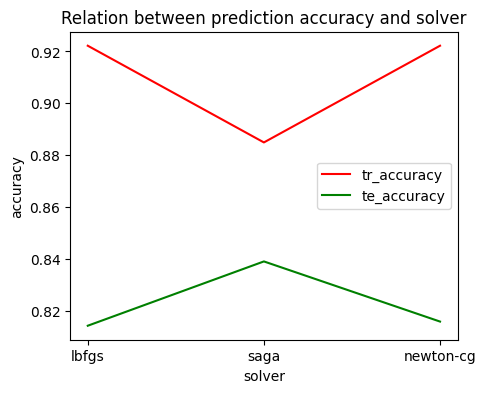

In [8]:
"""pass in solver and test out the relation between accuracy and solver"""
best_solver, best_accuracy_solver = train_solver(X_tr_scaled, y_train, X_te_scaled, y_test, np.array(["lbfgs", "saga", "newton-cg"]))

In [81]:
#function to plot confusion matrix
def plot_confusion_matrix(y_pred: np.array, y_true: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"]
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=class_names)
    disp.plot(xticks_rotation=45); 
    
    plt.show()

In [11]:
best_model = LogisticRegression(max_iter=1500, C=0.3,random_state=seed, solver="saga")
best_model.fit(X_tr_scaled, y_train)

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.3, max_iter=1500, random_state=1234, solver='saga')

In [13]:
best_model.score(X_te_scaled, y_test)

0.8429

In [80]:
#function to print classification report
from sklearn.metrics import classification_report

def print_classification(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"]))

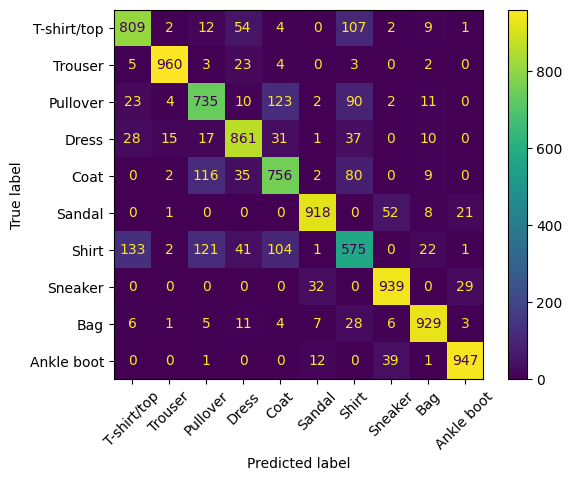

In [46]:
"""PLOT confusion matrix"""
y_pred = best_model.predict(X_te_scaled)
plot_confusion_matrix(y_pred, y_test)

In [79]:
"""print classification"""
print_classification(y_test, y_pred)

NameError: name 'print_classification' is not defined

In [ ]:
learning_curve(best_model, X_tr_scaled, y_train, train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1.]))

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UCI\2024-2025 Q3 

-- Epoch 1
Norm: 269.75, NNZs: 744, Bias: -1542.209664, T: 60000, Avg. loss: 24.132063
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 263.98, NNZs: 735, Bias: -1481.666118, T: 120000, Avg. loss: 9.608977
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 259.65, NNZs: 737, Bias: -1446.085138, T: 180000, Avg. loss: 8.585982
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 256.05, NNZs: 734, Bias: -1420.835153, T: 240000, Avg. loss: 8.111998
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 253.93, NNZs: 733, Bias: -1401.167501, T: 300000, Avg. loss: 7.865318
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 252.62, NNZs: 734, Bias: -1385.005168, T: 360000, Avg. loss: 7.636523
Total training time: 1.19 seconds.
-- Epoch 7
Norm: 252.15, NNZs: 733, Bias: -1371.262141, T: 420000, Avg. loss: 7.433555
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 249.88, NNZs: 738, Bias: -1359.676282, T: 480000, Avg. loss: 7.325124
Total training time: 1.51 seconds.
-- Epoch 9
Norm: 249.26,

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 284.96, NNZs: 742, Bias: -1668.296404, T: 60000, Avg. loss: 25.549685
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 276.72, NNZs: 741, Bias: -1606.243019, T: 120000, Avg. loss: 10.488584
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 272.84, NNZs: 745, Bias: -1569.844467, T: 180000, Avg. loss: 9.433129
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 271.16, NNZs: 741, Bias: -1543.534795, T: 240000, Avg. loss: 8.890282
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 270.19, NNZs: 735, Bias: -1523.195482, T: 300000, Avg. loss: 8.559959
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 268.09, NNZs: 738, Bias: -1506.710818, T: 360000, Avg. loss: 8.379478
Total training time: 1.02 seconds.
-- Epoch 7
Norm: 267.54, NNZs: 739, Bias: -1492.573270, T: 420000, Avg. loss: 8.226032
Total training time: 1.19 seconds.
-- Epoch 8
Norm: 266.63, NNZs: 743, Bias: -1480.402833, T: 480000, Avg. loss: 8.064262
Total training time: 1.38 seconds.
-- Epoch 9
Norm: 266.17

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 264.44, NNZs: 745, Bias: -1476.679327, T: 60000, Avg. loss: 24.040821
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 252.73, NNZs: 743, Bias: -1417.134235, T: 120000, Avg. loss: 9.262059
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 250.24, NNZs: 737, Bias: -1381.868262, T: 180000, Avg. loss: 8.162560
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 248.56, NNZs: 740, Bias: -1356.718100, T: 240000, Avg. loss: 7.682947
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 246.95, NNZs: 731, Bias: -1337.223771, T: 300000, Avg. loss: 7.450886
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 245.82, NNZs: 735, Bias: -1321.296702, T: 360000, Avg. loss: 7.191011
Total training time: 1.45 seconds.
-- Epoch 7
Norm: 244.47, NNZs: 734, Bias: -1307.916093, T: 420000, Avg. loss: 7.053100
Total training time: 1.71 seconds.
-- Epoch 8
Norm: 242.98, NNZs: 733, Bias: -1296.404061, T: 480000, Avg. loss: 6.897193
Total training time: 1.99 seconds.
-- Epoch 9
Norm: 241.51,

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Norm: 258.28, NNZs: 743, Bias: -1491.143228, T: 60000, Avg. loss: 24.431948
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 252.63, NNZs: 727, Bias: -1431.452925, T: 120000, Avg. loss: 9.248446
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 248.63, NNZs: 734, Bias: -1396.018849, T: 180000, Avg. loss: 8.308772
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 249.57, NNZs: 737, Bias: -1370.352876, T: 240000, Avg. loss: 7.785908
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 247.69, NNZs: 738, Bias: -1350.876994, T: 300000, Avg. loss: 7.516719
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 247.36, NNZs: 735, Bias: -1334.761351, T: 360000, Avg. loss: 7.270534
Total training time: 1.72 seconds.
-- Epoch 7
Norm: 245.40, NNZs: 735, Bias: -1321.437620, T: 420000, Avg. loss: 7.102295
Total training time: 1.97 seconds.
-- Epoch 8
Norm: 243.38, NNZs: 735, Bias: -1309.971513, T: 480000, Avg. loss: 6.968553
Total training time: 2.15 seconds.
-- Epoch 9
Norm: 243.37, NNZs: 737,

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Norm: 262.33, NNZs: 730, Bias: -1520.213395, T: 60000, Avg. loss: 23.014062
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 256.16, NNZs: 729, Bias: -1459.437630, T: 120000, Avg. loss: 9.485558
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 258.55, NNZs: 725, Bias: -1422.728014, T: 180000, Avg. loss: 8.433422
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 254.12, NNZs: 724, Bias: -1397.905879, T: 240000, Avg. loss: 7.932207
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 253.56, NNZs: 729, Bias: -1378.041013, T: 300000, Avg. loss: 7.653760
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 252.13, NNZs: 730, Bias: -1361.936353, T: 360000, Avg. loss: 7.478411
Total training time: 1.27 seconds.
-- Epoch 7
Norm: 249.36, NNZs: 730, Bias: -1348.662206, T: 420000, Avg. loss: 7.261995
Total training time: 1.53 seconds.
-- Epoch 8
Norm: 247.58, NNZs: 733, Bias: -1337.058722, T: 480000, Avg. loss: 7.126043
Total training time: 1.78 seconds.
-- Epoch 9
Norm: 246.84, NNZs: 737,

c:\UCI\2024-2025 Q3 Spring\CS 178\cs178hw2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


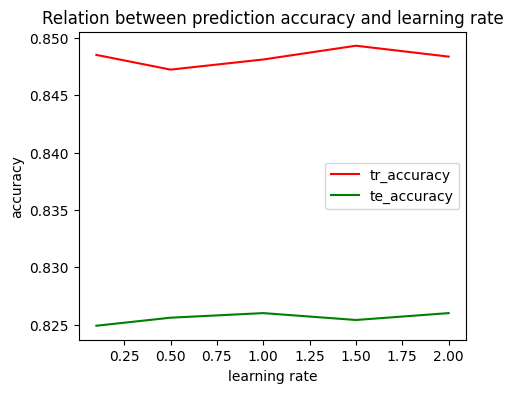

In [6]:
from sklearn.linear_model import SGDClassifier
learning_rate_list = [0.1,0.5,1,1.5,2]
tr_acc = []
te_acc = []
for lr in learning_rate_list:
    sgd_logistic = SGDClassifier(loss='log_loss', penalty='elasticnet', eta0=lr,verbose=3)
    sgd_logistic.fit(X_tr_scaled, y_train)
    tr_acc.append(sgd_logistic.score(X_tr_scaled, y_train))
    te_acc.append(sgd_logistic.score(X_te_scaled, y_test))
figure, axes = plt.subplots(1, figsize=(5, 4))
axes.plot(learning_rate_list, tr_acc, color="red", label="tr_accuracy")
axes.plot(learning_rate_list, te_acc, color="green",label="te_accuracy")
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.title("Relation between prediction accuracy and learning rate")
plt.legend()
plt.show()

Base code for the following class Logistic is from "https://github.com/bamtak/machine-learning-implemetation-python/blob/master/Multi%20Class%20Logistic%20Regression.ipynb"

In [147]:
class Logistic:
    
    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
    
    def fit(self, X, y, X_val, y_val, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        y_val = self.one_hot(y_val)
        X_val = self.add_bias(X_val)
        self.loss = []
        self.val_loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, X_val, y_val, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, X_val, y_val, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            self.val_loss.append(self.cross_entropy(y_val, self.predict_(X_val)))
            error = y - self.predict_(X)
            update = (lr * (1/len(X) * np.dot(error.T, X)))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

In [148]:
lr = Logistic(n_iter = 4000, thres=1e-5)
X_tr_flat = np.array([x.flatten() for x in X_tr_scaled])
lr.fit(X_tr_scaled,y_train, X_te_scaled, y_test, lr=0.01, rand_seed=seed)

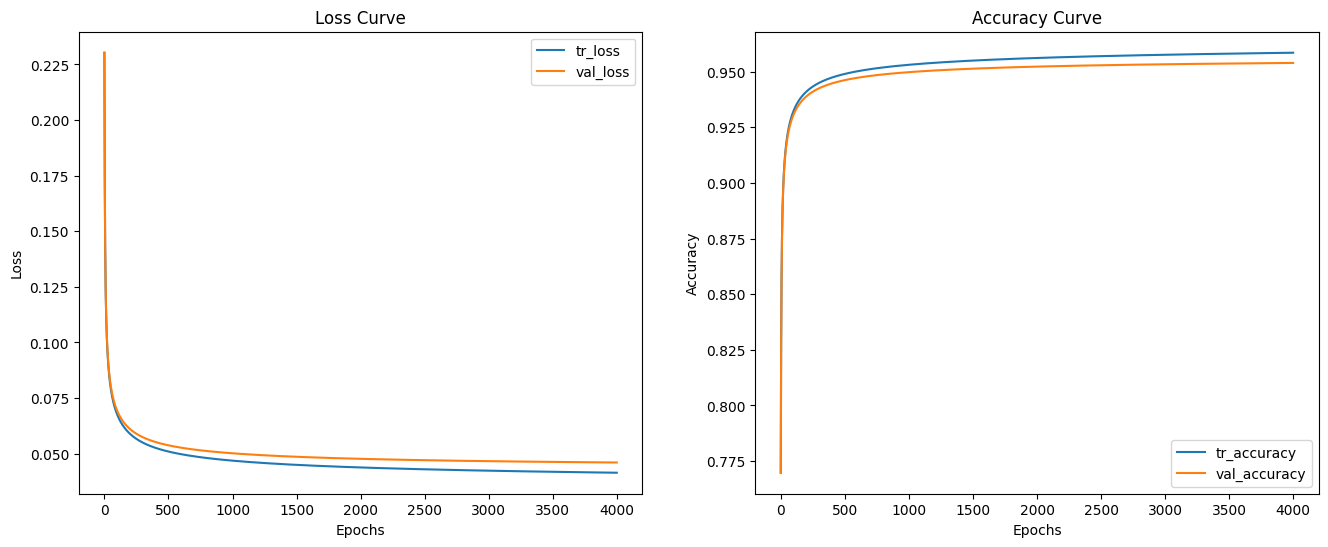

In [149]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].plot(np.arange(len(lr.loss)), lr.loss, label="tr_loss")
axes[0].plot(np.arange(len(lr.val_loss)), lr.val_loss, label="val_loss")
axes[0].set_title("Loss Curve")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(np.arange(len(lr.loss)), np.array([1-x for x in lr.loss]), label="tr_accuracy")
axes[1].plot(np.arange(len(lr.val_loss)), np.array([1-x for x in lr.val_loss]), label="val_accuracy")
axes[1].set_title("Accuracy Curve")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.show()

In [150]:

print_classification(y_test, lr.predict_classes(X_te_scaled))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.73      0.73      0.73      1000
       Dress       0.82      0.86      0.84      1000
        Coat       0.72      0.76      0.74      1000
      Sandal       0.92      0.91      0.91      1000
       Shirt       0.62      0.56      0.59      1000
     Sneaker       0.90      0.92      0.91      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



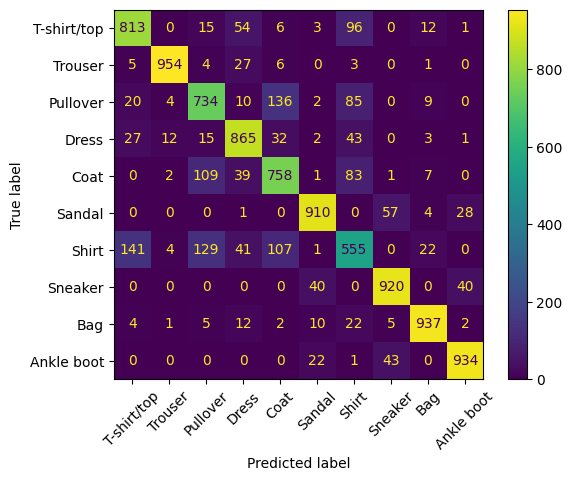

In [151]:
plot_confusion_matrix(lr.predict_classes(X_te_scaled), y_test)